In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\VCBB.csv")

df = df[['Price','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df1 = df
# Split the data into training, testing, and validation
train_size = int(0.7 * len(df))
test_size = len(df1) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

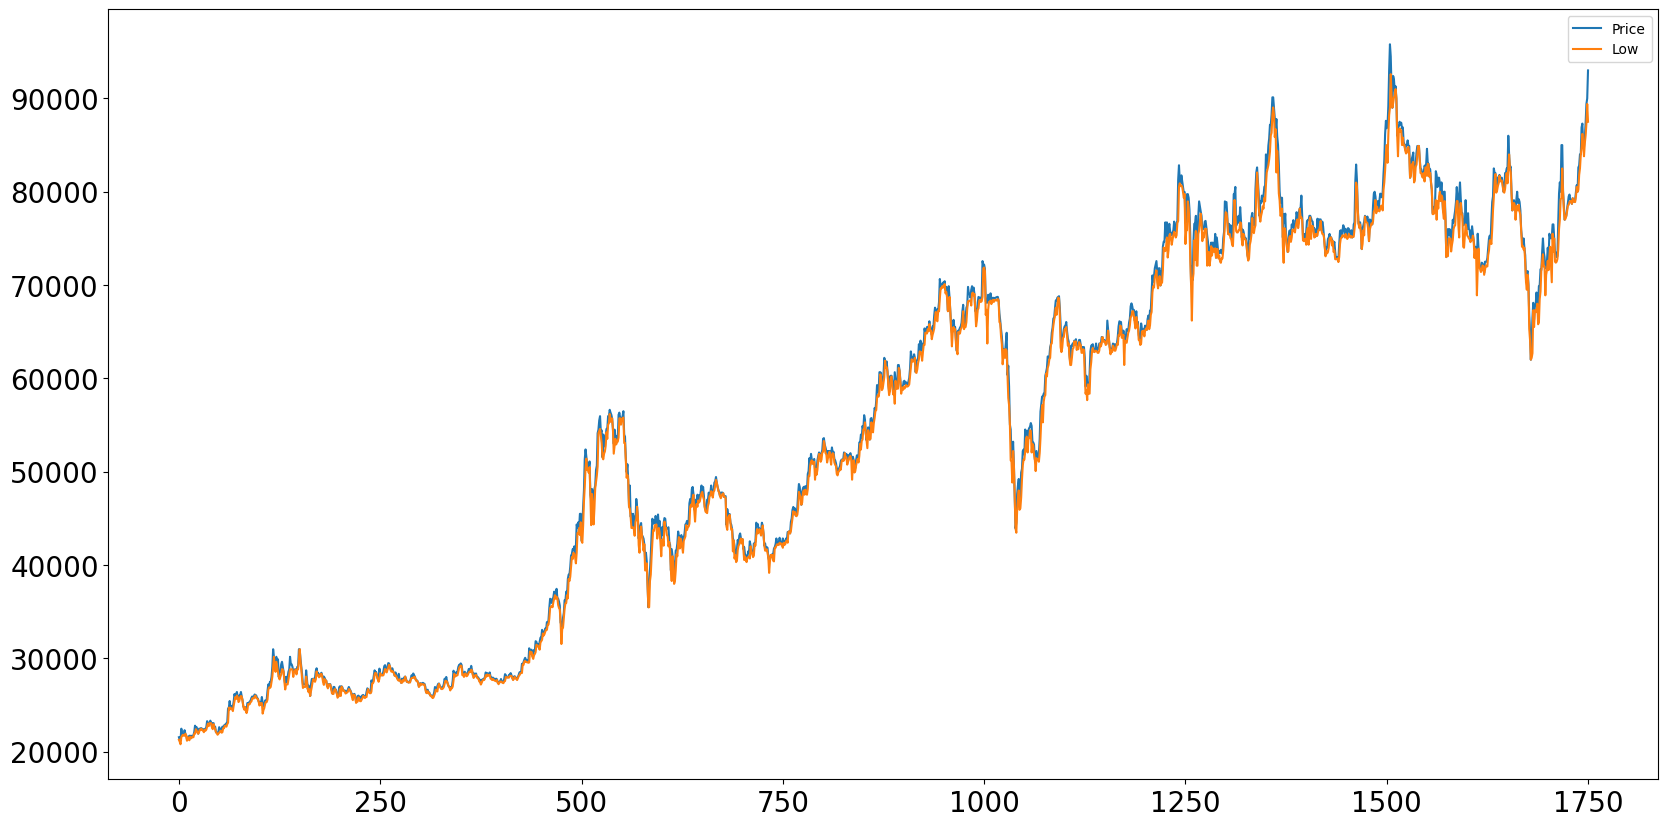

In [3]:
# Xem lại dataset
df.plot(figsize=(20, 10), fontsize=20)
plt.show()

In [4]:
# Tìm m thích hợp
# Dùng adf để kiểm tra xem dataset có stationary hay chưa
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-0.8600955336273238,
 0.8008294392866551,
 0,
 1750,
 {'1%': -3.4340922388213175,
  '5%': -2.863192990001633,
  '10%': -2.5676500029387754},
 28958.721362774268)

In [5]:
# Vì dataset chưa stationary nên ta thực hiện diff()
df_diff = df1['Price'].diff().dropna()

In [6]:
# Tiếp tục dùng adf để kiểm tra xem p value có < 0.05 ko
adfuller(df_diff)

(-14.573346314670854,
 4.5906577968256565e-27,
 8,
 1741,
 {'1%': -3.4341116127463858,
  '5%': -2.863201542300677,
  '10%': -2.567654556829725},
 28941.62014397561)

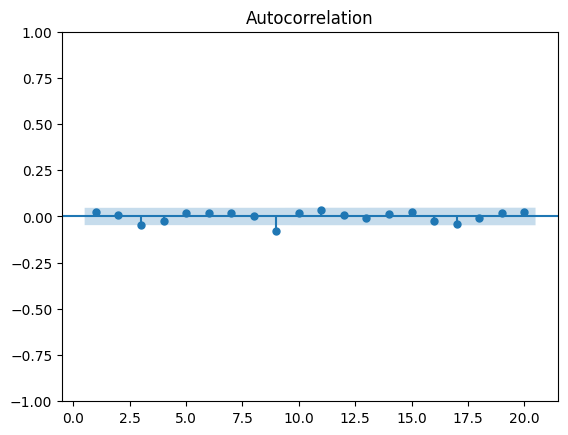

In [7]:
# Sau khi dataset đã stationary vẽ acf để tìm m
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags = 20 , zero = False)
plt.show()

In [8]:
df

,Price,Low
0,21552,21283
1,21229,21067
2,21337,20798
3,22468,21552
4,21876,21714
...,...,...
1746,85800,85200
1747,87300,86000
1748,89400,87300
1749,90000,89400


In [9]:
# Tạo y_train, x_train
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Dùng auto_arima để tìm thông số thích hợp
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = True, m =5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=19998.950, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=19999.777, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=20000.771, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=20000.858, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=20000.935, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=19997.596, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=20000.255, Time=0.63 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=19999.596, Time=1.89 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=19997.515, Time=1.26 sec
 ARIMA(2,1,2)(2,0,0)[5] intercept   : AIC=19999.504, Time=1.54 sec
 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=20001.869, Time=1.95 sec
 ARIMA(1,1,2)(1,0,0)[5] intercept   : AIC=20001.944, Time=0.31 sec
 ARIMA(2,1,1)(1,0,0)[5] intercept   : AIC=20002.092, Time=0.29 sec
 ARIMA(3,1,2)(1,0,0)[5] intercept   : AIC=19999.224, Time=0.88 sec
 ARIMA(2,1,3)(1,0,0

In [10]:
# Dùng SARIMAX để train model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y_train, exog = np.array(train_data['Price']), order=(2,1,2), seasonal_order=(1, 0, 0, 5))
model_fit = model1.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Quá trình test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
exg = np.array(test_data['Low'])
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_test)+len(y_train)-1, exog=exg)
y_pred_test

array([73644., 74105., 75103., 72953., 73721., 75329., 75484., 75019.,
       74322., 74864., 75329., 75716., 75484., 75096., 75329., 76645.,
       76877., 80516., 80903., 80593., 80671., 80516., 79974., 79355.,
       79742., 74400., 75871., 75871., 78967., 78271., 76645., 72696.,
       70142., 66193., 70451., 71226., 74787., 72696., 75793., 72077.,
       72077., 75484., 75871., 76722., 77651., 76800., 74709., 75561.,
       75096., 76025., 75871., 76025., 72077., 73548., 73548., 72077.,
       72774., 74167., 73161., 73935., 73626., 73548., 73935., 72929.,
       73858., 73858., 72851., 73161., 72542., 72387., 72851., 72851.,
       73703., 75019., 76335., 77806., 77729., 77032., 75484., 75406.,
       75484., 75019., 74942., 74322., 74167., 76258., 79122., 77806.,
       75793., 75638., 75638., 75871., 75871., 76722., 76645., 74864.,
       74245., 75484., 75096., 74942., 74787., 74167., 73161., 72619.,
       72851., 74322., 74709., 75406., 77187., 75871., 75561., 76103.,
      

In [12]:
# Quá trình tạo index predict 30 ngày tiếp theo
# Dùng thuật toán LR để tìm giá trị Low cho 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['Price'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá trị price 30 ngày tiếp theo
price_next_30_days = ln_model.predict(x_next_30_days)

# Predict prices for the next 30 days
y_next_30_days = model_fit.predict(start=len(x_train), end = len(x_train)+ len(x_next_30_days)-1, exog=price_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[91076.97242146 91118.12958418 91159.2867469  91200.44390962
 91241.60107234 91282.75823507 91323.91539779 91365.07256051
 91406.22972323 91447.38688595 91488.54404867 91529.70121139
 91570.85837412 91612.01553684 91653.17269956 91694.32986228
 91735.487025   91776.64418772 91817.80135045 91858.95851317
 91900.11567589 91941.27283861 91982.43000133 92023.58716405
 92064.74432677 92105.9014895  92147.05865222 92188.21581494
 92229.37297766 92270.53014038]


In [13]:
# Đánh giá độ chính xác thuật toán với MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

# MAPE (thay thế MSE bằng MAPE)
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

# MAE
test_mae = np.mean(np.abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)


Testing RMSE: 1554.3266560193088
Testing MAPE: 1.3549998907694543
Testing MAE: 1070.163498098859


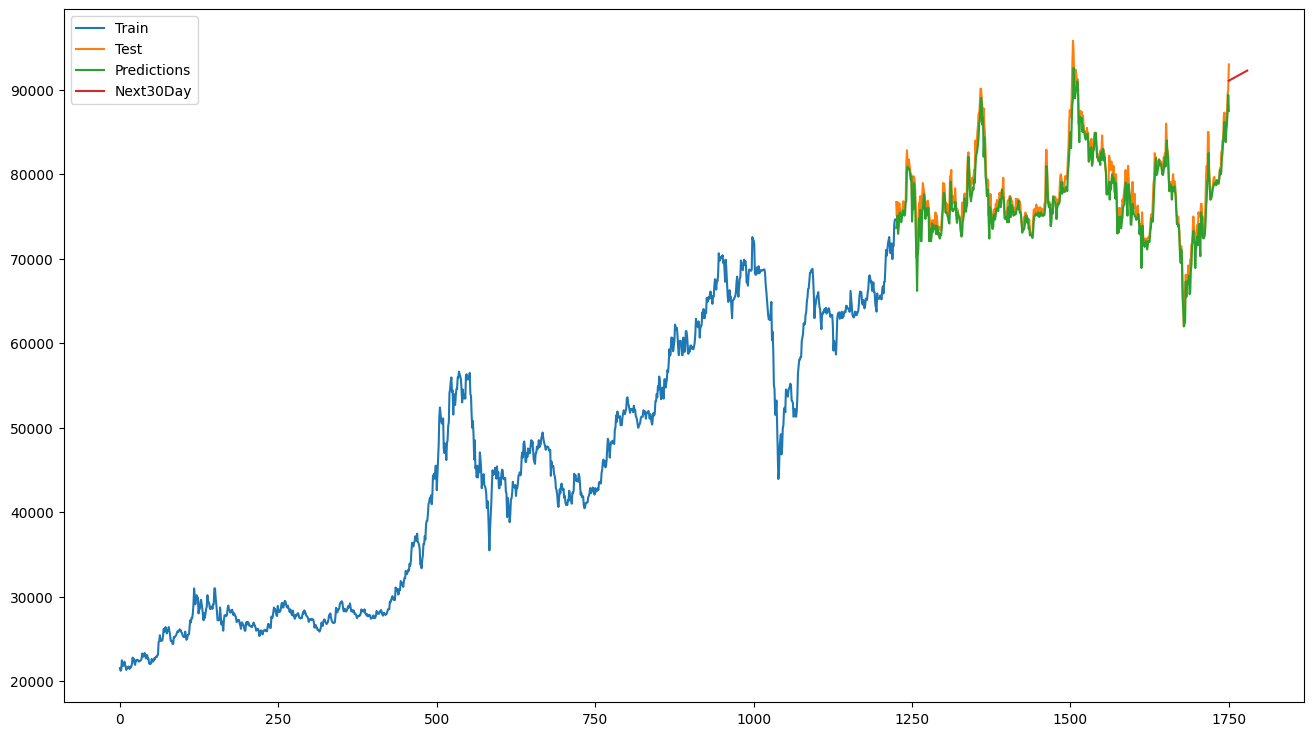

In [14]:
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()